In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

tf.reset_default_graph()

housing= fetch_california_housing()

In [3]:
m,n= housing.data.shape

In [4]:
housing_data_plus_bias= np.c_[np.ones((m,1)), housing.data]

In [5]:
housing_data_plus_bias.shape

(20640, 9)

In [6]:
X= tf.constant(housing_data_plus_bias, tf.float32, name="X")
y= tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")

In [7]:
XT= tf.transpose(X)
theta= tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)),XT),y)

In [8]:
with tf.Session() as sess:
    print(theta.eval())

[[-3.7185181e+01]
 [ 4.3633747e-01]
 [ 9.3952334e-03]
 [-1.0711310e-01]
 [ 6.4479220e-01]
 [-4.0338000e-06]
 [-3.7813708e-03]
 [-4.2348403e-01]
 [-4.3721911e-01]]


In [9]:
tf.reset_default_graph()

scaler= StandardScaler()
scaled_housing_data= scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias= np.c_[np.ones((m,1)), scaled_housing_data]

n_epochs=1000
lr=0.01

In [10]:
X= tf.constant(scaled_housing_data_plus_bias, tf.float32, name="X")
y= tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")

In [11]:
theta= tf.Variable(tf.random_uniform([n+1,1], -1.0,1.0), name='theta')

In [12]:
y_pred= tf.matmul(X, theta, name="predictions")
error= y_pred-y

In [13]:
mse= tf.reduce_mean(tf.square(error), name='mse')
gradients= 2/m*tf.matmul(tf.transpose(X), error)

In [14]:
training_op= tf.assign(theta, theta-lr*gradients)

In [15]:
init= tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        sess.run(training_op)
        if epoch%100 == 0:
            print("EPoch: ", epoch, "MSE: ", mse.eval())
        
        
    best_theta= theta.eval()

EPoch:  0 MSE:  4.894837
EPoch:  100 MSE:  0.6277854
EPoch:  200 MSE:  0.5529114
EPoch:  300 MSE:  0.5464861
EPoch:  400 MSE:  0.5424296
EPoch:  500 MSE:  0.5391757
EPoch:  600 MSE:  0.5365308
EPoch:  700 MSE:  0.5343739
EPoch:  800 MSE:  0.5326103
EPoch:  900 MSE:  0.5311651


In [16]:
best_theta

array([[ 2.0685523e+00],
       [ 9.0265828e-01],
       [ 1.3900998e-01],
       [-3.9124501e-01],
       [ 4.0425456e-01],
       [ 1.9183499e-03],
       [-4.2597238e-02],
       [-6.8361855e-01],
       [-6.6218078e-01]], dtype=float32)

In [17]:
optimizer= tf.train.GradientDescentOptimizer(lr)
training_op=optimizer.minimize(mse)

In [19]:
optimizer2= tf.train.MomentumOptimizer(learning_rate=lr, momentum=0.9)
training_op2=optimizer2.minimize(mse)

In [20]:
A= tf.placeholder(tf.float32, shape=(None, 3))
B= A + 5

In [21]:
with tf.Session() as sess:
    B_val_1= B.eval(feed_dict={A: [[1,2,3]]})
    B_val_2= B.eval(feed_dict={A: [[1,2,3], [3,4,5]]})

In [22]:
print(B_val_1)
print(B_val_2)

[[6. 7. 8.]]
[[ 6.  7.  8.]
 [ 8.  9. 10.]]


In [27]:
X= tf.placeholder(tf.float32, shape=(None, n+1), name="X")
y= tf.placeholder(tf.float32, shape=(None, 1), name="y")

batch_size=100
n_batches= int(np.ceil(m/batch_size))

In [28]:
def fetch_data(epoch, batch_index, batch_size):
    np.random.seed(epoch*n_batches + batch_size)
    indices= np.random.randint(m, size=batch_size)
    X_batch= scaled_housing_data_plus_bias[indices]
    y_batch= housing.target.reshape(-1,1)[indices]
    return X_batch, y_batch

In [31]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch= fetch_data(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
            
    best_theta= theta.eval()

# Saving and Restoring Model

In [75]:
tf.reset_default_graph()

saver= tf.train.Saver({"weights":theta})

n_epochs=1000
lr=0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")            
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")            
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")                                      
error = y_pred - y                                                                    
mse = tf.reduce_mean(tf.square(error), name="mse")                                    
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)            
training_op = optimizer.minimize(mse) 


init = tf.global_variables_initializer()

saver= tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())                                
            save_path = saver.save(sess, "checkpoint/model.ckpt")
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "checkpoint/model_final.ckpt")

Epoch 0 MSE = 2.7544262
Epoch 100 MSE = 0.63222194
Epoch 200 MSE = 0.5727803
Epoch 300 MSE = 0.5585008
Epoch 400 MSE = 0.54907
Epoch 500 MSE = 0.54228795
Epoch 600 MSE = 0.5373791
Epoch 700 MSE = 0.53382194
Epoch 800 MSE = 0.5312425
Epoch 900 MSE = 0.5293705


In [64]:
best_theta

array([[ 2.06855226e+00],
       [ 7.74078071e-01],
       [ 1.31192386e-01],
       [-1.17845066e-01],
       [ 1.64778143e-01],
       [ 7.44078017e-04],
       [-3.91945131e-02],
       [-8.61356676e-01],
       [-8.23479772e-01]], dtype=float32)

In [76]:
with tf.Session() as sess:
    saver.restore(sess, "checkpoint/model.ckpt")
    best_theta_restored= theta.eval()

INFO:tensorflow:Restoring parameters from checkpoint/model.ckpt


In [77]:
np.allclose(best_theta, best_theta_restored)

False

In [78]:
best_theta

array([[ 2.06855226e+00],
       [ 7.74078071e-01],
       [ 1.31192386e-01],
       [-1.17845066e-01],
       [ 1.64778143e-01],
       [ 7.44078017e-04],
       [-3.91945131e-02],
       [-8.61356676e-01],
       [-8.23479772e-01]], dtype=float32)

In [82]:
tf.reset_default_graph()

saver= tf.train.import_meta_graph("checkpoint/model.ckpt.meta")
theta= tf.get_default_graph().get_tensor_by_name("theta:0")

In [88]:
with tf.Session() as sess:
    saver.restore(sess, "checkpoint/model.ckpt")
    best_theta_restored= theta.eval()

INFO:tensorflow:Restoring parameters from checkpoint/model.ckpt


# Visualizing Graph using TensorBorad

In [133]:
from datetime import datetime

tf.reset_default_graph()

now= datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir="tf_logs"
logdir= "{}/run-{}".format(root_logdir, now)


In [134]:
n_epochs=1000
lr=0.01

In [135]:
X= tf.placeholder(tf.float32, shape= (None, n+1), name="X")
y= tf.placeholder(tf.float32, shape= (None, 1), name="y")

theta= tf.Variable(tf.random_uniform([n+1, 1], -1.0,1.0, seed=42), name="theta")
y_pred= tf.matmul(X, theta, name="prediction")

In [136]:
def fetch_data(epoch, batch_index, batch_size):
    np.random.seed(epoch*n_batches + batch_size)
    indices= np.random.randint(m, size=batch_size)
    X_batch= scaled_housing_data_plus_bias[indices]
    y_batch= housing.target.reshape(-1,1)[indices]
    return X_batch, y_batch

In [137]:
with tf.name_scope("loss") as scope:
    error= y_pred - y
    mse= tf.reduce_mean(tf.square(error), name="mse")

In [138]:
optimizer= tf.train.GradientDescentOptimizer(lr)
train_ops= optimizer.minimize(mse)

In [139]:
init= tf.global_variables_initializer()

mse_summary= tf.summary.scalar('MSE', mse)
file_writer= tf.summary.FileWriter(logdir, tf.get_default_graph())

In [140]:
n_epochs=10
batch_size=100
n_batches= int(np.ceil(m/batch_size)) 

In [141]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch= fetch_data(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str= mse_summary.eval(feed_dict={X:X_batch, y:y_batch})
                step= epoch*n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(train_ops, feed_dict={X:X_batch, y:y_batch})
    
    best_theta= theta.eval()
    
file_writer.flush()
file_writer.close()
print("best theta:")
print(best_theta)

best theta:
[[ 2.110401  ]
 [ 0.8305104 ]
 [ 0.2103839 ]
 [-0.03092568]
 [ 0.33762753]
 [-0.10639951]
 [-1.1107156 ]
 [-1.0491753 ]
 [-0.96639705]]


In [144]:
print(error.op.name)
print(mse.op.name)

loss/sub
loss/mse


In [147]:
tf.reset_default_graph()

a1 = tf.Variable(0, name="a")      # name == "a"
a2 = tf.Variable(0, name="a")      # name == "a_1"

with tf.name_scope("param"):       # name == "param"
    a3 = tf.Variable(0, name="a")  # name == "param/a"

with tf.name_scope("param"):       # name == "param_1"
    a4 = tf.Variable(0, name="a")  # name == "param_1/a"

for node in (a1, a2, a3, a4):
    print(node.op.name)

a
a_1
param/a
param_1/a


# Modularity

In [160]:
tf.reset_default_graph()

n_features=3
X= tf.placeholder(tf.float32, shape=(None, n_features), name="X")

w1= tf.Variable(tf.random_normal((n_features, 1)), name="weight1")
w2= tf.Variable(tf.random_normal((n_features, 1)), name="weight2")
b1= tf.Variable(0.0, name="bias1")
b2= tf.Variable(0.0, name="bias2")

In [161]:
z1= tf.add(tf.matmul(X, w1), b1, name="z1")
z2= tf.add(tf.matmul(X, w2), b2, name="z2")

In [162]:
relu1= tf.maximum(z1, 0, name="relu1")
relu2= tf.maximum(z2, 0, name="relu2")

In [163]:
output= tf.add(relu1, relu2, name="output")

In [164]:
def relu(X):
    w_shape= (int(X.get_shape()[1]),1)
    w= tf.Variable(tf.random_normal(w_shape), name="weights")
    b= tf.Variable(0.0, name="bias")
    z= tf.add(tf.multiply(X, w), b, name="z")
    return tf.maximum(z, 0., name="relu")

n_features=3
X= tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus= [relu(X) for i in range(5)]
output= tf.add_n(relus, name="output")

file_writer= tf.summary.FileWriter("logs/relu2", tf.get_default_graph())
file_writer.close()

In [174]:
tf.reset_default_graph()

def relu(X):
    with tf.name_scope("relu"):
        w_shape= (int(X.get_shape()[1]),1)
        w= tf.Variable(tf.random_normal(w_shape), name="weights")
        b= tf.Variable(0.0, name="bias")
        z= tf.add(tf.multiply(X, w), b, name="z")
        return tf.maximum(z, 0., name="relu")

n_features=3
X= tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus= [relu(X) for i in range(5)]
output= tf.add_n(relus, name="output")

file_writer= tf.summary.FileWriter("logs/relu1", tf.get_default_graph())
file_writer.close()

In [175]:
tf.reset_default_graph()

def relu(X):
    with tf.name_scope("relu"):
        if not hasattr(relu, "threshold"):
            relu.threshold = tf.Variable(0.0, name="threshold")
        w_shape= (int(X.get_shape()[1]),1)
        w= tf.Variable(tf.random_normal(w_shape), name="weights")
        b= tf.Variable(0.0, name="bias")
        z= tf.add(tf.multiply(X, w), b, name="z")
        return tf.maximum(z, relu.threshold, name="relu")

n_features=3
threshold= tf.Variable(0.0, name="threshold")
X= tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus= [relu(X) for i in range(5)]
output= tf.add_n(relus, name="output")

file_writer= tf.summary.FileWriter("logs/relu3", tf.get_default_graph())
file_writer.close()

# Exercise

In [16]:
x= tf.constant(2)
y= tf.constant(3)

In [17]:
with tf.Session() as sess:
    print(x.eval(session=sess))
    print(sess.run(x))
    print(sess.run([x,y]))

2
2
[2, 3]


# Logistic Regression with TF

In [133]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import tensorflow as tf
import os

m=1000
X_moons, y_moons= make_moons(m, noise=0.1, random_state=42)

In [65]:
X_moons_with_bias= np.c_[np.ones((m,1)), X_moons]

In [66]:
X_moons_with_bias[:5]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665]])

In [67]:
y_moons_vec= y_moons.reshape(-1,1)

In [68]:
test_ratio=0.2
test_size= int(m*test_ratio)

X_train=X_moons_with_bias[:-test_size]
X_test=X_moons_with_bias[-test_size:]

y_train=y_moons_vec[:-test_size]
y_test=y_moons_vec[-test_size:]

In [69]:
def random_batch(X_train, y_train, batch_size):
    index= np.random.randint(0, len(X_train), batch_size)
    X_batch= X_train[index]
    y_batch= y_train[index]
    return X_batch, y_batch

In [70]:
tf.reset_default_graph()

In [72]:
X_train.shape

(800, 3)

In [73]:
n_inputs= X_train.shape[1]

In [75]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta= tf.Variable(tf.random_uniform([n_inputs, 1], -1.0, 1.0, seed=42), name="theta")

logits= tf.matmul(X, theta, name="logits")

y_proba= tf.sigmoid(logits)

In [76]:
epsilon= 1e-7
loss= -tf.reduce_mean(y*tf.log(y_proba+epsilon) + (1-y)*tf.log(1-y_proba+epsilon))

In [77]:
loss= tf.losses.log_loss(y, y_proba)

In [78]:
lr=0.01
optimizer= tf.train.GradientDescentOptimizer(lr)
training_ops= optimizer.minimize(loss)

In [81]:
init= tf.global_variables_initializer()

In [82]:
n_epochs=1000
batch_size=50
n_batches= int(np.ceil(m/batch_size))

In [84]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch= random_batch(X_train, y_train, batch_size)
            sess.run(training_ops, feed_dict={X: X_batch, y: y_batch})
        loss_val= loss.eval({X:X_test, y:y_test})
        if epoch % 100 == 0:
            print("Epoch: ", epoch, " Loss: ", loss_val)
    y_proba_val= y_proba.eval(feed_dict={X:X_test, y:y_test})

Epoch:  0  Loss:  0.87668914
Epoch:  100  Loss:  0.35262862
Epoch:  200  Loss:  0.31121537
Epoch:  300  Loss:  0.29478484
Epoch:  400  Loss:  0.28630102
Epoch:  500  Loss:  0.28130656
Epoch:  600  Loss:  0.27860996
Epoch:  700  Loss:  0.27664283
Epoch:  800  Loss:  0.2752615
Epoch:  900  Loss:  0.27466014


In [85]:
y_proba_val[:10]

array([[0.54544383],
       [0.7086868 ],
       [0.5152017 ],
       [0.99107164],
       [0.50745684],
       [0.01029209],
       [0.9753125 ],
       [0.03910354],
       [0.43440217],
       [0.63773334]], dtype=float32)

In [88]:
y_pred= (y_proba_val > 0.5)
y_pred[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [89]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred)

0.8627450980392157

In [90]:
recall_score(y_test, y_pred)

0.8888888888888888

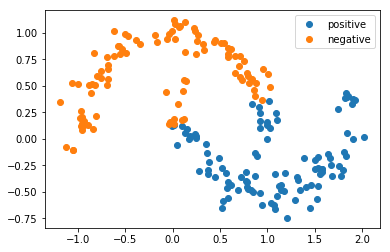

In [108]:
y_pred_idx= y_pred.reshape(-1)
plt.plot(X_test[y_pred_idx,1], X_test[y_pred_idx,2], "o", label="positive")
plt.plot(X_test[~y_pred_idx,1], X_test[~y_pred_idx,2], "o", label="negative")
plt.legend()

In [113]:
X_train_enhanced= np.c_[X_train,
                       np.square(X_train[:,1]),
                       np.square(X_train[:,2]),
                       X_train[:,1]**3,
                       X_train[:,2]**3]

X_test_enhanced= np.c_[X_test,
                       np.square(X_test[:,1]),
                       np.square(X_test[:,2]),
                       X_test[:,1]**3,
                       X_test[:,2]**3]

In [114]:
X_train_enhanced[:5]

array([[ 1.00000000e+00, -5.14696757e-02,  4.44198631e-01,
         2.64912752e-03,  1.97312424e-01, -1.36349734e-04,
         8.76459084e-02],
       [ 1.00000000e+00,  1.03201691e+00, -4.19741157e-01,
         1.06505890e+00,  1.76182639e-01,  1.09915879e+00,
        -7.39511049e-02],
       [ 1.00000000e+00,  8.67891864e-01, -2.54827114e-01,
         7.53236288e-01,  6.49368582e-02,  6.53727646e-01,
        -1.65476722e-02],
       [ 1.00000000e+00,  2.88850997e-01, -4.48668621e-01,
         8.34348982e-02,  2.01303531e-01,  2.41002535e-02,
        -9.03185778e-02],
       [ 1.00000000e+00, -8.33439108e-01,  5.35056649e-01,
         6.94620746e-01,  2.86285618e-01, -5.78924095e-01,
         1.53179024e-01]])

In [146]:
tf.reset_default_graph()

In [147]:
def logistic_regression(X, y, initializer=None, lr=0.01, seed=42):
    n_inputs_including_bias= X_train_enhanced.shape[1]
    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            if initializer==None:
                initializer= tf.random_uniform([n_inputs_including_bias, 1], -1.,1., seed=seed)
            theta= tf.Variable(initializer, name="theta")
            logits= tf.matmul(X, theta, name="logits")
            y_proba= tf.sigmoid(logits)
            
        with tf.name_scope("train"):
            loss= tf.losses.log_loss(y, y_proba, scope="loss")
            optimizer= tf.train.GradientDescentOptimizer(learning_rate=lr)
            training_op= optimizer.minimize(loss)
            loss_summary= tf.summary.scalar('log_loss', loss)
        with tf.name_scope("init"):
            init= tf.global_variables_initializer()
        with tf.name_scope("save"):
            saver= tf.train.Saver()
    return y_proba, loss, training_op, loss_summary, init, saver

In [148]:
from datetime import datetime

def log_dir(prefix=""):
    now= datetime.utcnow().strftime("%Y%M%D%H%M%S")
    root_logdir= "tf_logs"
    if prefix:
        prefix += "-"
    name= prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [149]:
n_inputs= 2 + 4
logdir= log_dir("logreg")

X= tf.placeholder(tf.float32, shape=(None, n_inputs+1), name="X")
y= tf.placeholder(tf.float32, shape=(None, 1), name="y")

In [150]:
y_proba, loss, training_op, loss_summary, init, saver= logistic_regression(X,y)

In [151]:
file_writer= tf.summary.FileWriter(logdir, tf.get_default_graph())

In [152]:
n_epochs=10001
batch_size=50
n_batches= int(np.ceil(m/batch_size))

In [153]:
checkpoint_path= "checkpoint/logreg/log_reg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path= "./final_model/"

In [156]:
with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch= int(f.read())
        print("Training was Interrupted. Resuming at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch=0
        sess.run(init)
        
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch= random_batch(X_train_enhanced, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, summary_str= sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("Epoch: ", epoch, " Loss:", loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
                
    saver.save(sess, final_model_path)
    y_proba_val= y_proba.eval(feed_dict= {X: X_test_enhanced, y: y_test})
    os.remove(checkpoint_epoch_path)

Training was Interrupted. Resuming at epoch 10001
INFO:tensorflow:Restoring parameters from checkpoint/logreg/log_reg_model.ckpt
Epoch:  0  Loss: 0.025686476
Epoch:  500  Loss: 0.025520563
Epoch:  1000  Loss: 0.025318561
Epoch:  1500  Loss: 0.0252012
Epoch:  2000  Loss: 0.02497815
Epoch:  2500  Loss: 0.024856025
Epoch:  3000  Loss: 0.024656612
Epoch:  3500  Loss: 0.024534598
Epoch:  4000  Loss: 0.02441683
Epoch:  4500  Loss: 0.024256002
Epoch:  5000  Loss: 0.024120495
Epoch:  5500  Loss: 0.024002291
Epoch:  6000  Loss: 0.023835566
Epoch:  6500  Loss: 0.023685226
Epoch:  7000  Loss: 0.02358039
Epoch:  7500  Loss: 0.023495078
Epoch:  8000  Loss: 0.023368578
Epoch:  8500  Loss: 0.023268532
Epoch:  9000  Loss: 0.023130704
Epoch:  9500  Loss: 0.02304491
Epoch:  10000  Loss: 0.022927597
